In [32]:
# modules
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
# Importing core neural networks layers 
from keras.layers import Dense, Dropout, Activation, Flatten, UpSampling2D
# Importing CNN layers
from keras.layers import Conv2D, MaxPooling2D, Input
# Importing the sequential model in Keras
# Used as a linear stack of nn layers
from keras.models import Sequential, Model
# Tools for data transformation
from keras.utils import np_utils
from keras.callbacks import EarlyStopping
from keras.applications import VGG16
from keras.optimizers import RMSprop
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img

# 2 Image Classification
We’ll continue to use the Fashion MNIST dataset and build a deep convolutional network for classification.
## 2.1 Deep CNN
Build a deep CNN to classify the images. Provide a brief description of the architectural choices you’ve made: kernel sizes, strides, padding, network depth. Train your network end-to-end. Report on your model’s performance on training set and test set.
## 2.2 Transfer Learning
Repeat the same task, but this time utilize a pre-trained network for the major- ity of your model. You should only train the final Dense layer, all other weights should be fixed. You can use whichever pre-trained backbone you like (ResNet, VGG, etc). Report on your model’s performance on training set and test set.

In [2]:
# 2.1 Deep CNN

# Data Munging/Reshaping
# Load pre-shuffled Fashion MNIST data into train and test sets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
# Declaring a depth of 1 for MNIST
x_train = x_train.reshape(x_train.shape[0], 28, 28,1)
x_test = x_test.reshape(x_test.shape[0], 28, 28,1)
# Setting up calues as float32s that are bounded between 0 and 1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
# Convert 1-dimensional class arrays to 10-dimensional class matrices
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [3]:
# Declaring sequential model
model = Sequential()
# CNN input layer: input_shape: (depth,width,height)
# CNN convolution: number of filters, height and width of kernel
model.add(Conv2D(filters = 32,kernel_size=(3, 3), 
                 activation='relu', strides=(1, 1), 
                 padding='valid',
                 input_shape=(28,28,1)))
model.add(Conv2D(filters = 32,kernel_size=(3, 3), 
                 activation='relu', strides=(1, 1), 
                 padding='valid', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# Setting up the fully connected lauer
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                294976    
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
__________

In [4]:
#  Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# Fitting the model
history = model.fit(x_train, y_train,
                    epochs=100,
                    batch_size=128,
                    shuffle=True,
                    validation_data=(x_test, y_test),
                    callbacks=[EarlyStopping(monitor='val_loss', min_delta=0, patience=7, verbose=1, mode='auto')])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 95s 2ms/step - loss: 0.6488 - acc: 0.7746 - val_loss: 0.3927 - val_acc: 0.8603
Epoch 2/100
60000/60000 [==============================] - 94s 2ms/step - loss: 0.4289 - acc: 0.8495 - val_loss: 0.3302 - val_acc: 0.8828
Epoch 3/100
60000/60000 [==============================] - 94s 2ms/step - loss: 0.3757 - acc: 0.8668 - val_loss: 0.3015 - val_acc: 0.8942
Epoch 4/100
60000/60000 [==============================] - 91s 2ms/step - loss: 0.3434 - acc: 0.8761 - val_loss: 0.2869 - val_acc: 0.8994
Epoch 5/100
60000/60000 [==============================] - 93s 2ms/step - loss: 0.3203 - acc: 0.8861 - val_loss: 0.2642 - val_acc: 0.9035
Epoch 6/100
60000/60000 [==============================] - 92s 2ms/step - loss: 0.3004 - acc: 0.8933 - val_loss: 0.2504 - val_acc: 0.9091
Epoch 7/100
60000/60000 [==============================] - 93s 2ms/step - loss: 0.2874 - acc: 0.8967 - val_loss: 0.2448 - 

In [5]:
#  Evaluating the model
score = model.evaluate(x_test, y_test, verbose=1)
print(score)

10000/10000 [==============================] - 3s 252us/step
[0.24069012755155564, 0.9231]


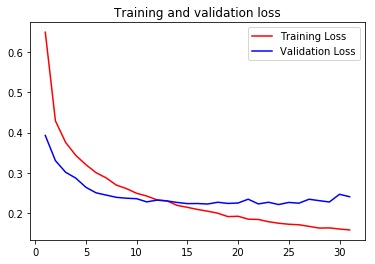

In [6]:
# Plot
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss) + 1)
plt.plot( epochs, loss, 'r', label = 'Training Loss')
plt.plot( epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [49]:
# 2.2 Transfer Learning
# Data Munging/Reshaping
# Load pre-shuffled Fashion MNIST data into train and test sets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
# Declaring a depth of 1 for MNIST
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)
# Setting up calues as float32s that are bounded between 0 and 1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = np.dstack([x_train] * 3)
x_test = np.dstack([x_test] * 3)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 3)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 3)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in x_train])
x_test = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in x_test])
x_train /= 255
x_test /= 255
# Convert 1-dimensional class arrays to 10-dimensional class matrices
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [ ]:
# Transfer Learning with VGG backbone
conv_base = VGG16(weights="imagenet",
                  include_top=False,
                  input_shape=(48,48,3))
# Extract features
train_features = conv_base.predict(np.array(x_train), batch_size=16, verbose=1)
test_features = conv_base.predict(np.array(x_test), batch_size=16, verbose=1)

# Build a model
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dense(10, activation="sigmoid"))
model.summary()

10240/60000 [====>.........................] - ETA: 8:05

In [ ]:
model.trainable_weights

In [46]:
# Freezing the weights for transfer learning
conv_base.trainable = False

In [47]:
model.trainable_weights

[<tf.Variable 'dense_13/kernel:0' shape=(512, 256) dtype=float32_ref>,
 <tf.Variable 'dense_13/bias:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'dense_14/kernel:0' shape=(256, 10) dtype=float32_ref>,
 <tf.Variable 'dense_14/bias:0' shape=(10,) dtype=float32_ref>]

In [48]:
# Compile the model
model.compile(loss="binary_crossentropy", 
              optimizer=RMSprop(1e-4),
              metrics=["acc"])
# Train the model
history = model.fit(np.reshape(train_features, (60000, 1*1*512)), 
                    y_train,
                    epochs=100,
                    batch_size=128,
                    shuffle=True,
                    validation_data=(x_test, y_test),
                    callbacks=[EarlyStopping(monitor='val_loss', min_delta=0, patience=7, verbose=1, mode='auto')])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
 4736/60000 [=>............................] - ETA: 10:00 - loss: 0.5529 - acc: 0.7480

KeyboardInterrupt: 

In [ ]:
#  Evaluating the model
score = model.evaluate(np.reshape(test_features, (10000, 1*1*512)), y_test, verbose=1)
print(score)

In [ ]:
# Plot
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Training + Valdiation Accuracy
epochs = range(1,len(acc) + 1)
plt.plot( epochs, acc, 'r', label = 'Training Accuracy')
plt.plot( epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

# Training + Validation Loss
epochs = range(1,len(loss) + 1)
plt.plot( epochs, loss, 'r', label = 'Training Loss')
plt.plot( epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()